In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="whitegrid")
plt.style.use('ggplot')

In [3]:
MODEL_DATA_PATH = "../data/output/phase4/model_data_test.csv"
AGENT_DATA_PATH = "../data/output/phase4/agent_data_test.csv"

In [4]:
try:
    model_df = pd.read_csv(MODEL_DATA_PATH, index_col=0)
    agent_df = pd.read_csv(AGENT_DATA_PATH, index_col=0)
    print(f"Successfully loaded Model Data (shape: {model_df.shape}) and Agent Data (shape: {agent_df.shape}).")
    
    for col in ['FoodPool', 'FoodPrice', 'TotalWealth']:
        if col in model_df.columns:
            model_df[col] = pd.to_numeric(model_df[col], errors='coerce')
        else:
            print(f"Warning: Column '{col}' not found. Check your MODEL_REPORTERS.")

except FileNotFoundError:
    print(f"Error: Data files not found")

Successfully loaded Model Data (shape: (10, 4)) and Agent Data (shape: (200, 6)).


1. Model-Level Analysis: Food Pool and Population

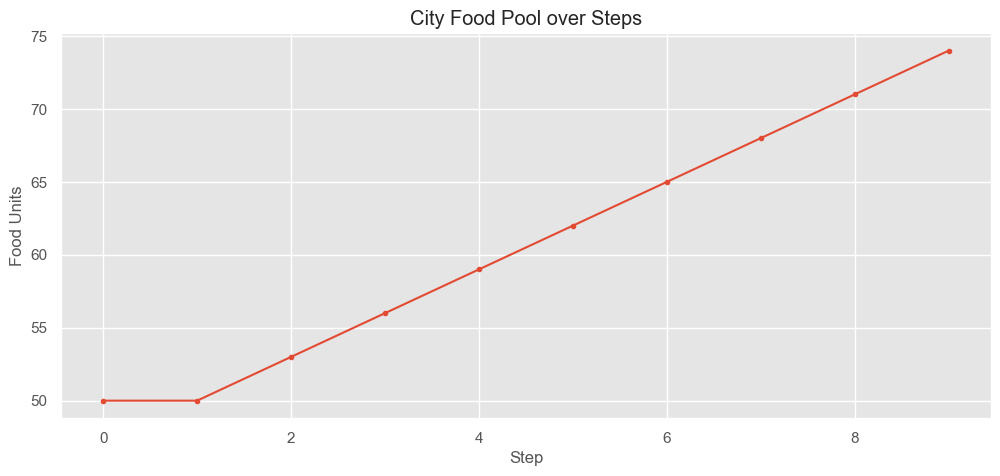

In [5]:
# 1.1 Food Pool over Time

plt.figure(figsize=(12,5))
plt.plot(model_df.index, model_df['FoodPool'], marker='.', linestyle='-')
plt.title('City Food Pool over Steps')
plt.xlabel('Step')
plt.ylabel('Food Units')
plt.grid(True)
plt.show()

2. Agent-Level Analysis: Individual Wealth

<Figure size 1200x600 with 0 Axes>

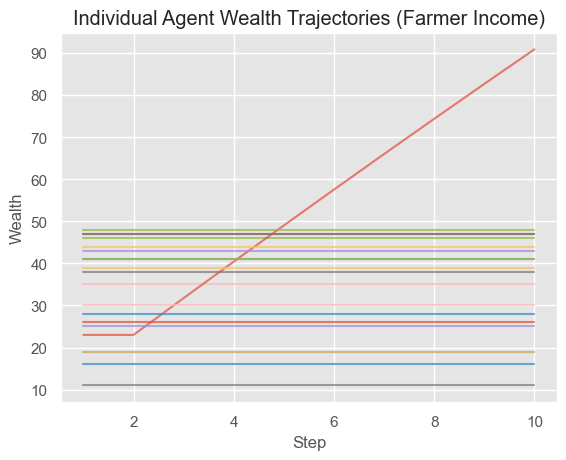

In [6]:
# 2.1 Agent-Wealth over Time

agent_df['Wealth'] = pd.to_numeric(agent_df['Wealth'], errors='coerce')
agent_df['Age'] = pd.to_numeric(agent_df['Age'], errors='coerce')

agent_df = agent_df.drop_duplicates(keep='last')

agent_df_reset = agent_df.reset_index()

agent_wealth = agent_df_reset.pivot(index='Step', columns='AgentID', values='Wealth')

plt.figure(figsize=(12, 6))
agent_wealth.plot(legend=False, alpha=0.7)
plt.title('Individual Agent Wealth Trajectories (Farmer Income)')
plt.xlabel('Step')
plt.ylabel('Wealth')
plt.show()

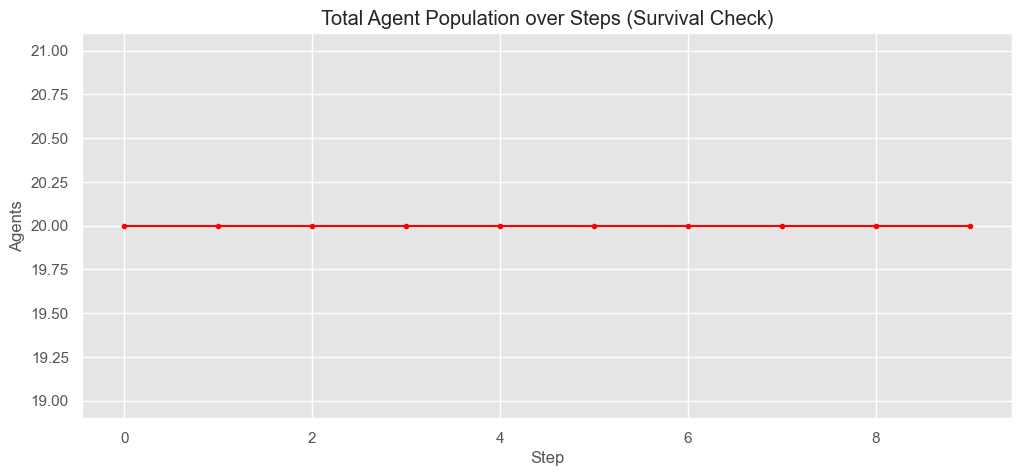

In [7]:
# 2.2 Total Agents (Population) over Time

plt.figure(figsize=(12, 5))
plt.plot(model_df.index, model_df['TotalAgents'], marker='.', linestyle='-', color='red')
plt.title('Total Agent Population over Steps (Survival Check)')
plt.xlabel('Step')
plt.ylabel('Agents')
plt.grid(True)
plt.show()

3. Dynamic Pricing

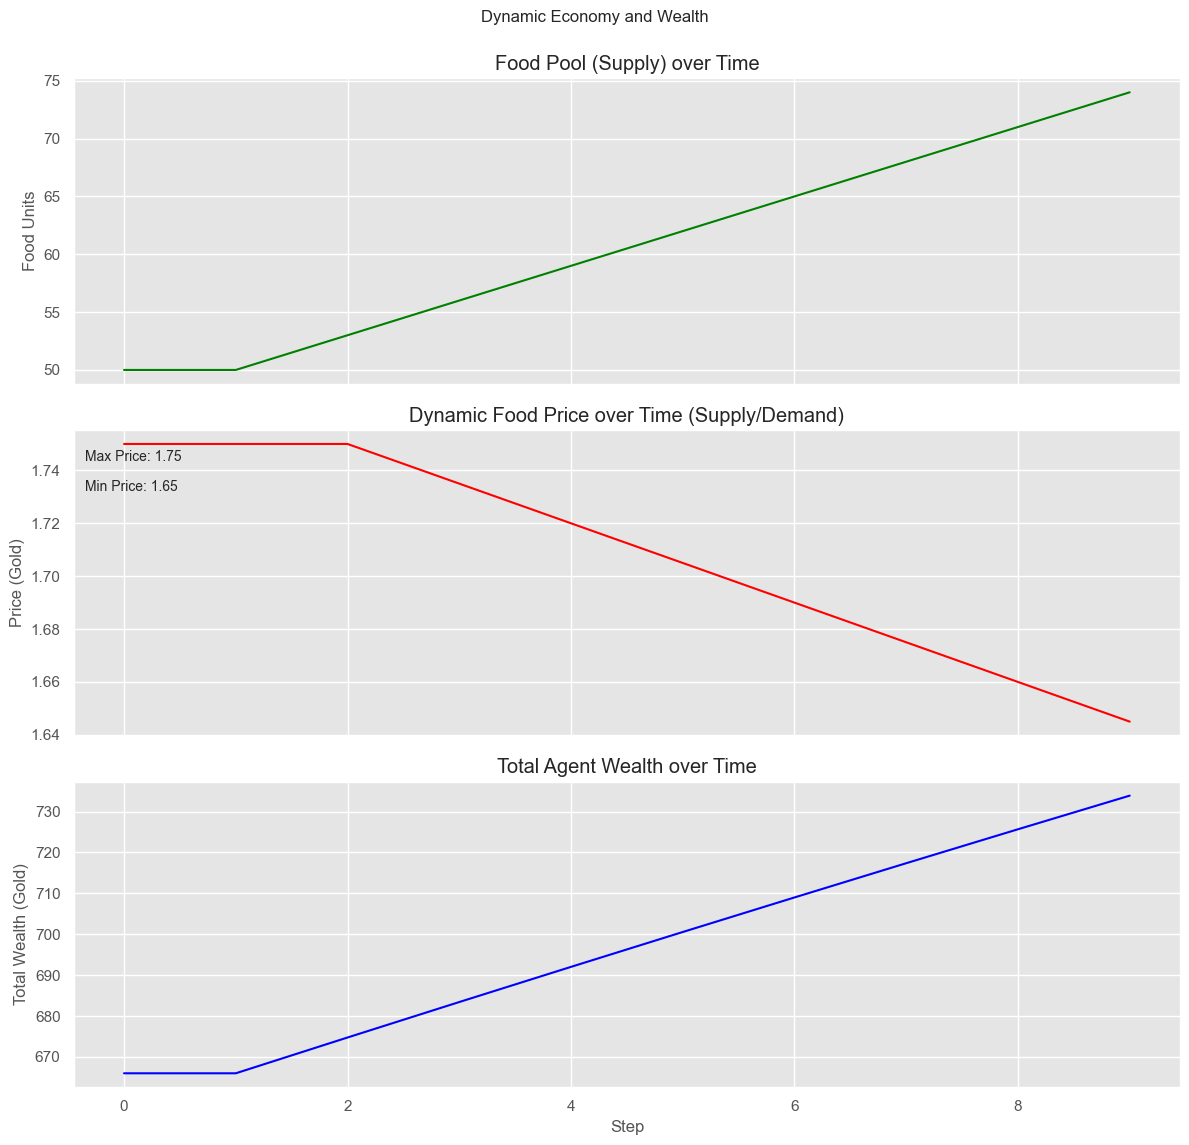

In [8]:
# 3.1 Macro-Economic Indicators

fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
fig.suptitle('Dynamic Economy and Wealth')

# 3.1.1 Food Pool (Supply)
if 'FoodPool' in model_df.columns:
    model_df['FoodPool'].plot(ax=axes[0], color='green')
    axes[0].set_title('Food Pool (Supply) over Time')
    axes[0].set_ylabel('Food Units')
    axes[0].grid(True)

# 3.1.2 Dynamic Food Price
if 'FoodPrice' in model_df.columns:
    model_df['FoodPrice'].plot(ax=axes[1], color='red')
    axes[1].set_title('Dynamic Food Price over Time (Supply/Demand)')
    axes[1].set_ylabel('Price (Gold)')
    axes[1].grid(True)
    max_price = model_df['FoodPrice'].max()
    min_price = model_df['FoodPrice'].min()
    axes[1].text(0.01, 0.9, f"Max Price: {max_price:.2f}", transform=axes[1].transAxes)
    axes[1].text(0.01, 0.8, f"Min Price: {min_price:.2f}", transform=axes[1].transAxes)

# 3.1.3 Total Agent Wealth
if 'TotalWealth' in model_df.columns:
    model_df['TotalWealth'].plot(ax=axes[2], color='blue')
    axes[2].set_title('Total Agent Wealth over Time')
    axes[2].set_xlabel('Step')
    axes[2].set_ylabel('Total Wealth (Gold)')
    axes[2].grid(True)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


Correlation between FoodPool and FoodPrice: -0.9926


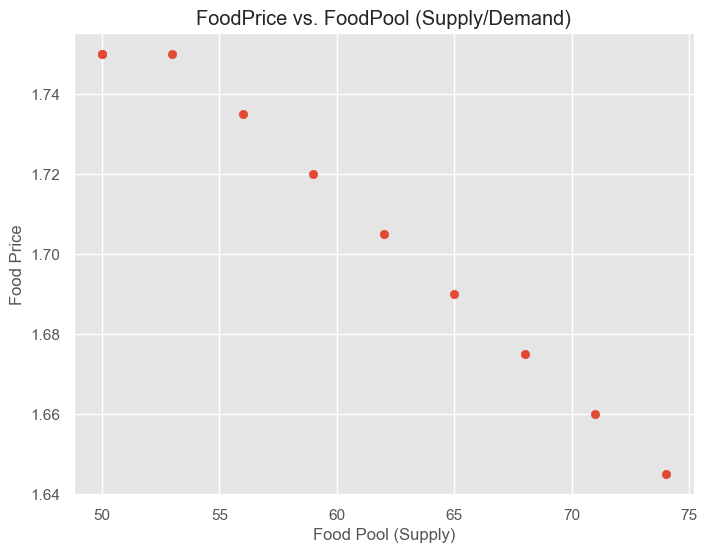

In [9]:
# 3.2 Correlation Analysis - Analyze the inverse relationship between FoodPool and FoodPrice

correlation = model_df['FoodPool'].corr(model_df['FoodPrice'])
print(f"\nCorrelation between FoodPool and FoodPrice: {correlation:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(model_df['FoodPool'], model_df['FoodPrice'])
plt.title('FoodPrice vs. FoodPool (Supply/Demand)')
plt.xlabel('Food Pool (Supply)')
plt.ylabel('Food Price')
plt.grid(True)
plt.show()